In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Лабораторная работа №5

## Вариант 3. Задание 1.

## Условие задачи

$$ \frac{\partial u}{\partial t} - 2 \frac{\partial u}{\partial x} = 0 $$

$$ u(x, 0) = \cos x; \hspace{1cm} u(1, t) = \cos (1 + 2t) $$

# Аналитическое решение задачи

In [3]:
def U_analytical(x, t=1):
    return np.cos(x + 2*t)

# Численное решение задачи

Создаём сетку и по выведенным разностным схемам находим $[U]_l^n$

In [8]:
def calculate_U(L=11, N=11):
    xs, h = np.linspace(0, 1, L, retstep=True)
    ts, dt = np.linspace(0, 1, N, retstep=True)

    U = [np.cos(xs)]

    for n, t in enumerate(ts[1:]):
        U_L = np.cos(1 + 2*t)
        U_L1 = U_L + np.sin(1 + 2*t) * h - np.cos(1 + 2*t) * h**2 / 2 - np.sin(1 + 2*t) * h**3 / 6
        U_L2 = U_L + np.sin(1 + 2*t) * 2*h - np.cos(1 + 2*t) * 2*h**2 - np.sin(1 + 2*t) * 4*h**3 / 3

        U_l3 = U[n][3:]
        U_l2 = U[n][2:-1]
        U_l1 = U[n][1:-2]
        U_l = U[n][:-3]

        S1 = 2*U_l3 - 9*U_l2 + 18*U_l1 - 11*U_l
        S2 = -U_l3 + 4*U_l2 - 5*U_l1 + 2*U_l
        S3 = U_l3 - 3*U_l2 + 3*U_l1 - U_l

        U_next = U_l + dt/(3 * h) * S1 + (2 * dt**2)/h**2 * S2 + (4 * dt**2)/(3 * h**2) * S3
        U.append(np.hstack([U_next, [U_L2, U_L1, U_L]]))

    return xs, U[-1]

# Общий ответ

In [18]:
def common_answer(L=11, N=11):
    grid, u = calculate_U(L, N)
    u_a = U_analytical(grid)
    max_diff = np.abs(u - u_a).max()
    
    step_for_output = (L - 1) // 10
    df = pd.DataFrame(
        {
            'Grid': grid[::step_for_output],
            'Model analytical': u_a[::step_for_output],
            'Model numerical': u[::step_for_output],
        }
    )
    print('Значения в 11 равноудаленных точках:\n')
    print(df.to_string(index=False))
    print(f'\nMax diff:\t{max_diff}\n')

    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(grid, u, '-r', label='numerical solution')
    ax.plot(grid, u_a, '--k', label='analytical solution')
    ax.set_xlabel('$x$', fontsize=14)
    ax.set_ylabel('$U(x, t=1)$', fontsize=14)
    ax.legend()

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0         -0.416147        -0.416110
  0.1         -0.504846        -0.504844
  0.2         -0.588501        -0.588454
  0.3         -0.666276        -0.666273
  0.4         -0.737394        -0.737338
  0.5         -0.801144        -0.801140
  0.6         -0.856889        -0.856827
  0.7         -0.904072        -0.904068
  0.8         -0.942222        -0.942157
  0.9         -0.970958        -0.970954
  1.0         -0.989992        -0.989992

Max diff:	6.553560144850756e-05



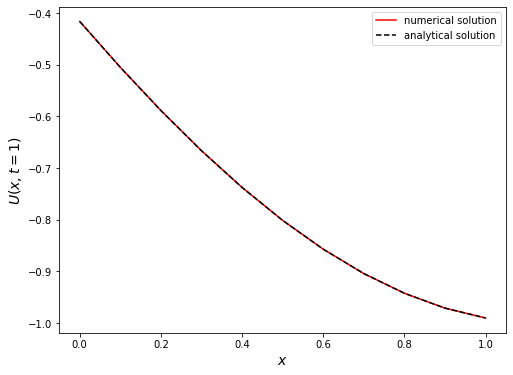

In [19]:
common_answer()

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0         -0.416147        -0.416147
  0.1         -0.504846        -0.504846
  0.2         -0.588501        -0.588501
  0.3         -0.666276        -0.666276
  0.4         -0.737394        -0.737394
  0.5         -0.801144        -0.801144
  0.6         -0.856889        -0.856889
  0.7         -0.904072        -0.904072
  0.8         -0.942222        -0.942222
  0.9         -0.970958        -0.970958
  1.0         -0.989992        -0.989992

Max diff:	1.0067083833220636e-09



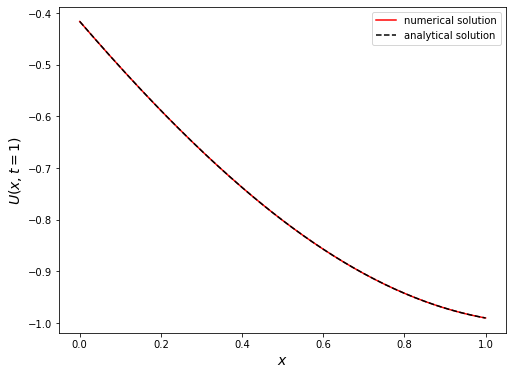

In [20]:
common_answer(L=161, N=161)

### Спектральная устойчивость нарушается

Значения в 11 равноудаленных точках:

 Grid  Model analytical  Model numerical
  0.0         -0.416147    -1.047544e+90
  0.1         -0.504846     2.821064e+89
  0.2         -0.588501    -5.653385e+89
  0.3         -0.666276     9.959081e+90
  0.4         -0.737394     1.048013e+96
  0.5         -0.801144     1.026616e+98
  0.6         -0.856889     1.030495e+97
  0.7         -0.904072     7.499492e+92
  0.8         -0.942222     1.299029e+85
  0.9         -0.970958     2.470165e+72
  1.0         -0.989992    -9.899925e-01

Max diff:	1.1306238782721476e+98



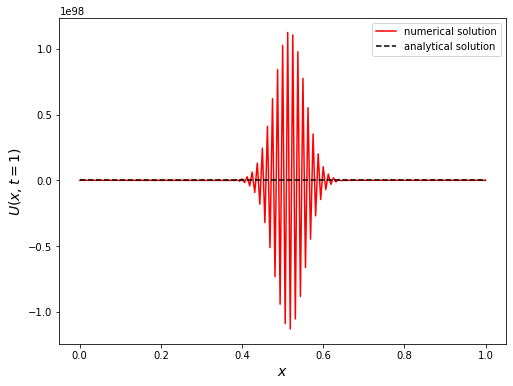

In [22]:
common_answer(L=161, N=61)